# Problem 1
### Feature selection for practice

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# Problem 2
### Estimation and evaluation by linear regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline


# Convert to numpy ndarray
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

X[:, 1]

array([2003, 1976, 2001, ..., 1941, 1950, 1965], dtype=int64)

In [4]:
# Get the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [5]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,200867.077532,233133.540393,120354.031201,211491.672634,67444.564761,285519.697454,192126.192343,232419.852677,249774.901644,200078.072703,...,96211.388799,244397.288181,116330.822305,231911.59251,216248.05026,138556.00665,144404.743112,182740.940585,268521.231651,118266.718598
1,200141.000000,307000.000000,132500.000000,175900.000000,85000.000000,265000.000000,155000.000000,241500.000000,301500.000000,185000.000000,...,129000.000000,240000.000000,142125.000000,172500.00000,244600.00000,132000.00000,141500.000000,158000.000000,200000.000000,129000.000000


In [6]:
# Use mean squared error for evaluation
mean_squared_error(y_test, reg_predict)

1791815089.95811

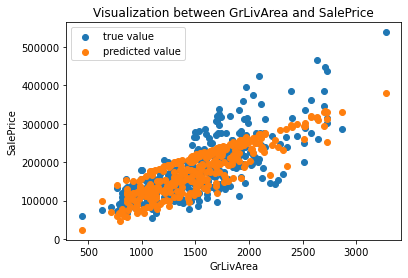

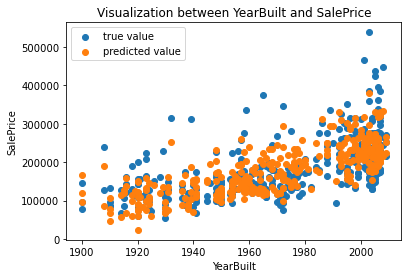

In [9]:
def plot_graph(xlabel, ylabel, X, y_true, y_pred):
    plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label='true value')
    plt.scatter(X, y_pred, label='predicted value')
    plt.legend()
    plt.show()
    
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, reg_predict)
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

# Problem 3
### Comparison and methods

1791815089.95811


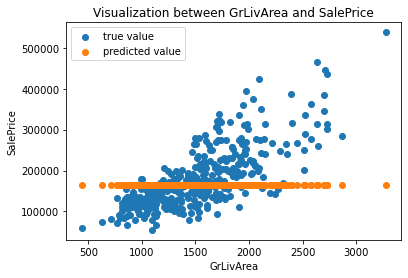

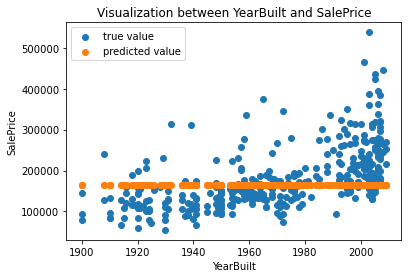

In [12]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Using SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print(mean_squared_error(y_test, reg_predict))

plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, svr_predict)

plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

2637976787.4472604


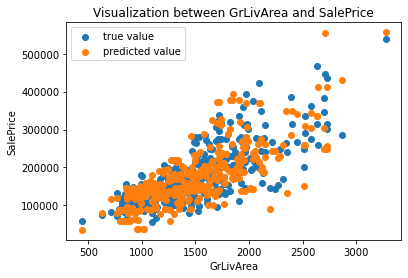

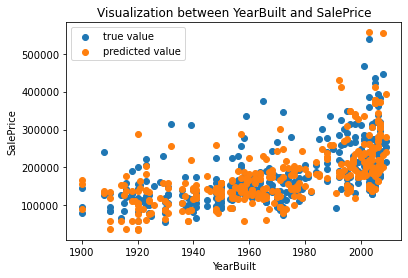

In [13]:
#Usingf Decision tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predict = dtr.predict(X_test)
print(mean_squared_error(y_test, dtr_predict))

plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, dtr_predict)
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, dtr_predict)

1797861214.1147592


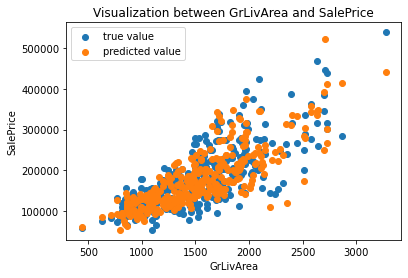

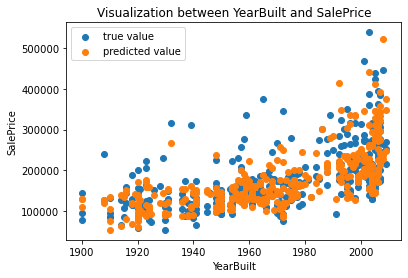

In [14]:
#using Random forest
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)
print(mean_squared_error(y_test, rfr_predict))

plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rfr_predict)
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rfr_predict)